### Task
Summary: Predict if an apple is rotten or not based on the features of the apple.

preprocess the data to get the following features:
- `x` : the input data, a 2D array of shape (n_samples, n_features)
- `y` : the target labels, a 1D array of shape (n_samples,)
- `X_test` : the input data for the test set, a 2D array of shape (n_samples, n_features)
- `y_test` : the target labels for the test set, a 1D array of shape (n_samples,)
- `X_train` : the input data for the training set, a 2D array of shape (n_samples, n_features)
- `y_train` : the target labels for the training set, a 1D array of shape (n_samples,)

The task is to predict whether an apple is rotten or not. The dataset contains 6 features:
Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
- `Size` : the size of the apple
- `Weight` : the weight of the apple
- `Sweetness` : the sweetness of the apple
- `Crunchiness` : the crunchiness of the apple
- `Juiciness` : the juiciness of the apple
- `Ripeness` : the ripeness of the apple
- `Acidity` : the acidity of the apple

The target is:
- `1` : the apple is rotten
- `0` : the apple is not rotten

Dataset:
- [Apple_Quality](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality) on kaggle

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Logistic_Regression import LogisticRegression
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression

from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('../data/apple_quality.csv')
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


Dataset info

In [3]:
print('# missing values:', np.sum(data.isnull().sum())) # No missing values
print('# rows:', data.shape[0]) # 4000 rows
num_data = data.drop(['Quality', 'A_id'], axis=1) # Remove the target(string) column
print('max value:', num_data.max().max(), '\nmin value:', num_data.min().min()) 

# missing values: 0
# rows: 4000
max value: 7.619851801 
min value: -7.151703059


In [4]:
# Split the data into train and test
X = data.drop(['Quality', 'A_id'], axis=1)
y = data['Quality']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy array
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

In [5]:
# encode the target labels
label_encoder = LabelEncoder()

# Fit and transform the target labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [6]:
# Scikit-learn's Logistic Regression
sk_lr = sk_LogisticRegression(max_iter=100000, C=0.1, penalty="l2", random_state=42, solver="lbfgs")
sk_lr.fit(X_train, y_train)

# My Logistic regression
my_lr = LogisticRegression(max_iter=100000, C=0.1, penalty="l2", random_state=42)
my_lr.fit(X_train, y_train)

print('Weights:\n\tSklearn:', sk_lr.coef_[0], '\n\tMy Model:', my_lr.coef_)
print('Intercept:\n\tSklearn:', sk_lr.intercept_[0], '\n\tMy Model:', my_lr.bias_)
print('# Iterations:\n\tSklearn:', sk_lr.n_iter_[0], '\n\tMy Model:', my_lr.n_iters_)

Weights:
	Sklearn: [ 0.63861714  0.25570217  0.57483747  0.02221652  0.43746469 -0.12948912
 -0.31326814] 
	My Model: [ 0.56526206  0.19674639  0.52957378  0.17293024  0.48571931 -0.09664784
 -0.30546986]
Intercept:
	Sklearn: 0.6418929149066527 
	My Model: 0.19735014131667525
# Iterations:
	Sklearn: 12 
	My Model: 91


In [7]:
y_pred = my_lr.predict(X_test)
s_y_pred = sk_lr.predict(X_test)

In [8]:
s_test_accuracy  = sk_lr.score(X_test, y_test)

test_accuracy  = my_lr.score(X_test, y_test)

print(f'Sklearn:\n\tTest Accuracy: {s_test_accuracy  * 100:.2f}%')
print(f'My Model:\n\tTest Accuracy: {test_accuracy  * 100:.2f}%')

Sklearn:
	Test Accuracy: 75.38%
My Model:
	Test Accuracy: 74.75%


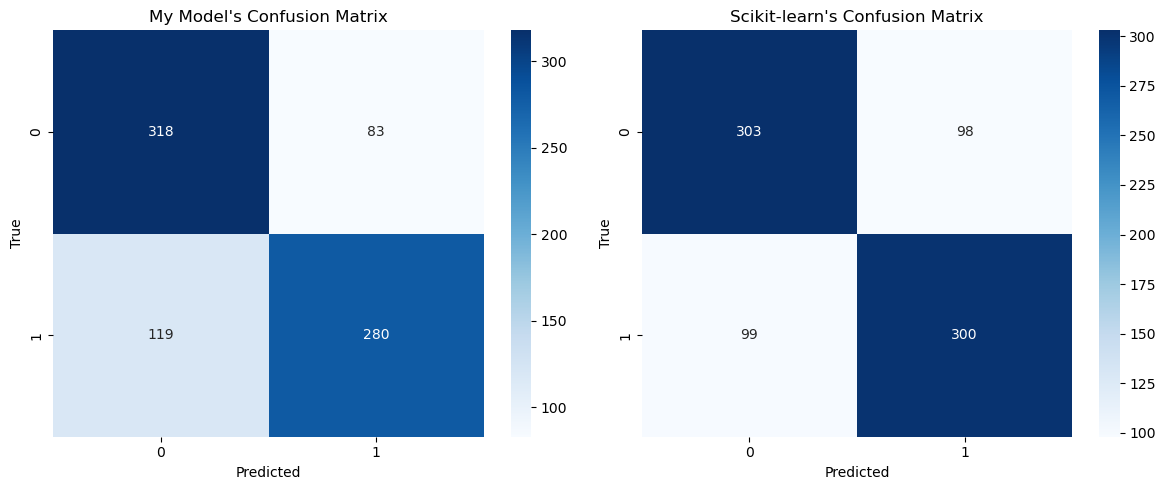

In [9]:
# Confusion matrices
conf_matrix = confusion_matrix(y_test, y_pred)
sk_conf_matrix = confusion_matrix(y_test, s_y_pred)

# To Plot both confusion matrices side by side
plt.figure(figsize=(12, 5))

# Confusion matrix for my model
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('My Model\'s Confusion Matrix')

# Confusion matrix for scikit-learn's model
plt.subplot(1, 2, 2)
sns.heatmap(sk_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Scikit-learn\'s Confusion Matrix')

plt.tight_layout()
plt.show()